# Task 1: Prediction Using Supervised ML

Predict the percentage of students based on number of study hours

# Author: Manish Gholam

Importing important libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('student_scores - student_scores.csv')

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Exploratory Data Analysis

Checking null values 

In [4]:
df.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [5]:

columns=list(df.columns)


In [6]:

X=df["Hours"].values.reshape(-1,1)
Y=df["Scores"].values.reshape(-1,1)


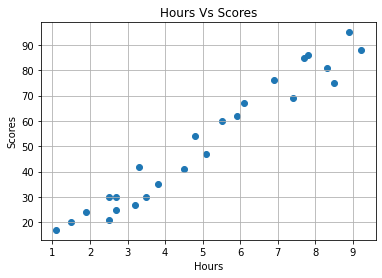

In [7]:

plt.scatter(X,Y, color="#1f77b4")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Hours Vs Scores")
plt.grid()
plt.show()

The graph is showing a Linear relationship between hours and scores

split the Data

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train, x_test, y_train, y_test=train_test_split(X,Y,test_size=0.20, random_state=0)


Loading modules for linear regression

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:

lr=LinearRegression()
lr


LinearRegression()

Training the model

In [12]:
lr.fit(x_train, y_train)


LinearRegression()

In [13]:
line=lr.coef_*X+lr.intercept_

Visualize The Train Data

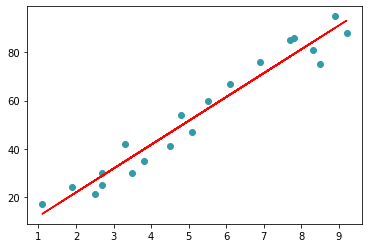

In [14]:
plt.scatter(x_train, y_train, color="#329ba8")
plt.plot(X, line, color="r")
plt.show()


In [15]:
Y_pred=lr.predict(x_test)
Y_pred

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

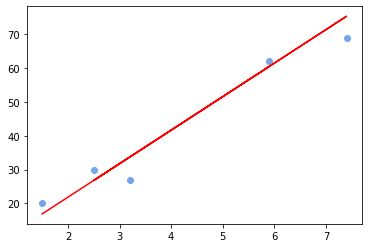

In [16]:
plt.scatter(x_test, y_test, color="#75a6eb")
plt.plot(x_test, Y_pred, color="Red")
plt.show()


In [19]:
df_predict=pd.DataFrame({"Hours":x_test.reshape(1,-1)[0],"Actual Score":y_test.reshape(1,-1)[0],"Predicted Score":Y_pred.reshape(1,-1)[0]})


In [20]:
df_predict

,Hours,Actual Score,Predicted Score
0,1.5,20,16.884145
1,3.2,27,33.732261
2,7.4,69,75.357018
3,2.5,30,26.794801
4,5.9,62,60.491033


In [21]:

df_sorted=df_predict.sort_values(by="Hours")
df_sorted


,Hours,Actual Score,Predicted Score
0,1.5,20,16.884145
3,2.5,30,26.794801
1,3.2,27,33.732261
4,5.9,62,60.491033
2,7.4,69,75.357018


C:\Users\MANISH\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\MANISH\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


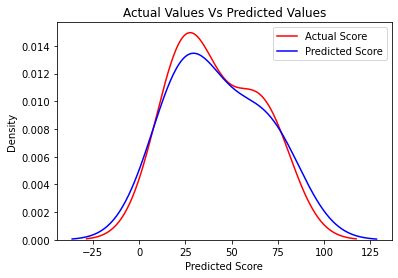

In [22]:

title="Actual Values Vs Predicted Values"
ax1=sns.distplot(df_sorted["Actual Score"], hist=False, color="red", label="Actual Score")
sns.distplot(df_sorted["Predicted Score"], hist=False, color="blue", label="Predicted Score", ax=ax1)
plt.legend()
plt.title(title)
plt.show()


In [25]:
from sklearn.metrics import r2_score
from sklearn import metrics
mean_absolute_error=metrics.mean_absolute_error(y_test, Y_pred)
print('Mean absolute error:',mean_absolute_error)
corr=r2_score(y_train, lr.predict(x_train))
print('correlation:',corr)
acc=r2_score(y_test, Y_pred)
print('Accuracy:',acc)


Mean absolute error: 4.183859899002975
correlation: 0.9515510725211552
Accuracy: 0.9454906892105356


Make the Predictions

In [26]:
hrs=9.25
pred=lr.predict([[9.25]])
print("The predicted score if a student studies for 9.25 hrs/day is", pred[0])

The predicted score if a student studies for 9.25 hrs/day is [93.69173249]
